In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('stroke.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Finding null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Droping null the value as they are siginificantly less in number
df = df.dropna()

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

[Text(0.5, 1.0, 'Glucose level vs BMI')]

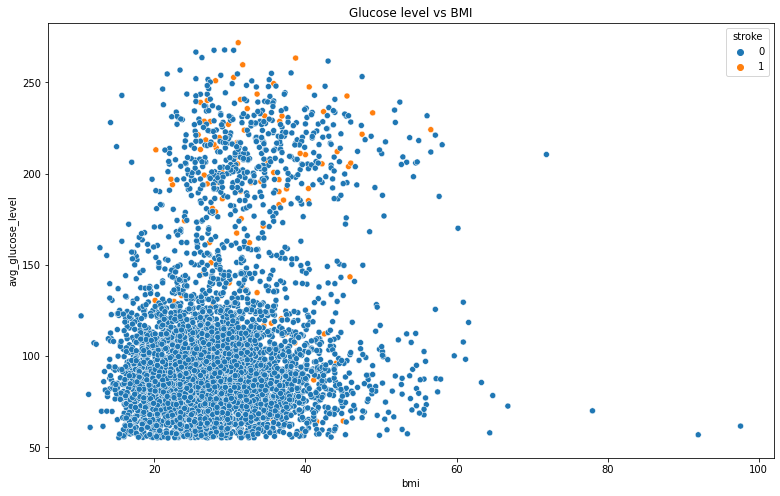

In [ ]:
# Plotting scatterplot between glucose level and BMI
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'],hue= df['stroke']).set(title='Glucose level vs BMI')

Observation:
 
 This scatterplot depicts the relation between glucose level and BMI. From the graph we can observe that people having comparatively higher glucose level and slighltly higher BMI have suffered from heart stroke.

[Text(0.5, 1.0, 'Smoking Status Count')]

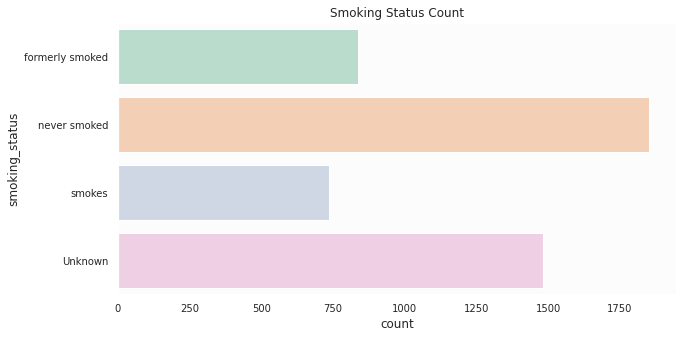

In [ ]:
#plotting counter plot for smoking status 
plt.figure(figsize=(10,5))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
sns.countplot(y ='smoking_status',data = df,palette = "Pastel2").set(title='Smoking Status Count')


[Text(0.5, 1.0, 'Glucose level vs Age')]

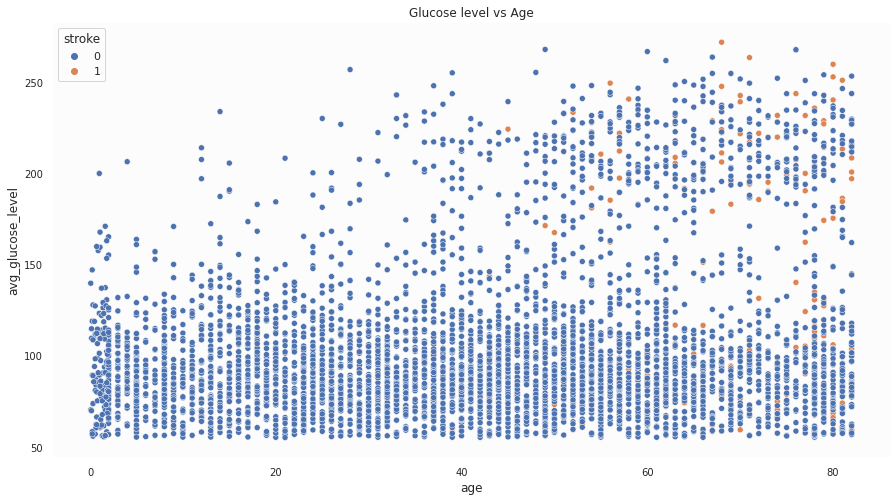

In [ ]:
# Plotting scatterplot between glucose level and age
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="age", y="avg_glucose_level", sizes=(20, 2000),hue= 'stroke').set(title='Glucose level vs Age')

Observation: 

This scatterplot depicts the relation between glucose level and Age.From the graph we can observe that people having higher glucose level and older age are more prone to having a heart stroke.

In [ ]:
df_test = pd.read_csv('stroke.csv')
df_test = df_test.dropna()

In [ ]:
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,1,1,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0,1,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,0,1,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0,0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,0,0,formerly smoked,1


In [ ]:
#Categorizing BMI in NonObese(0) and Obese(1)
df_test['bmi']=[0 if x < 30 else 1 for x in df_test['bmi']]

In [ ]:
# Independent T-Test to find out the siginificant relationship between BMI and heart stroke
rp.ttest(group1= df_test['stroke'][df_test['bmi'] == 0], group1_name= 'NotObese',
         group2= df_test['stroke'][df_test['bmi'] == 1], group2_name= 'Obese')

(   Variable       N      Mean        SD        SE  95% Conf.  Interval
 0  NotObese  2989.0  0.037136  0.189127  0.003459   0.030353  0.043919
 1     Obese  1920.0  0.051042  0.220140  0.005024   0.041189  0.060895
 2  combined  4909.0  0.042575  0.201917  0.002882   0.036925  0.048225,
                  Independent t-test    results
 0  Difference (NotObese - Obese) =     -0.0139
 1             Degrees of freedom =   4907.0000
 2                              t =     -2.3558
 3          Two side test p value =      0.0185
 4         Difference < 0 p value =      0.0093
 5         Difference > 0 p value =      0.9907
 6                      Cohen's d =     -0.0689
 7                      Hedge's g =     -0.0689
 8                  Glass's delta =     -0.0735
 9                    Pearson's r =      0.0336)

Obervation:

By performing T-Test we find the P value to be 0.01. 
Since the p value is less than 0.05 we can say that BMI has a significant affect on the possibility of having a heart stroke.

In [ ]:
# Categorizing Glucose level into Non Diabetic(0) and Diabetic(1)
df_test['avg_glucose_level']=[0 if x < 200 else 1 for x in df_test['avg_glucose_level']]       

In [ ]:
# Independent T-Test to find out the siginificant relationship between Glucose level and heart stroke
rp.ttest(group1= df_test['stroke'][df_test['avg_glucose_level'] == 0], group1_name= 'NotDiabetic',
         group2= df_test['stroke'][df_test['avg_glucose_level'] == 1], group2_name= 'Diabetic')

(      Variable       N      Mean        SD        SE  95% Conf.  Interval
 0  NotDiabetic  4518.0  0.035414  0.184844  0.002750   0.030023  0.040805
 1     Diabetic   391.0  0.125320  0.331505  0.016765   0.092359  0.158281
 2     combined  4909.0  0.042575  0.201917  0.002882   0.036925  0.048225,
                        Independent t-test    results
 0  Difference (NotDiabetic - Diabetic) =     -0.0899
 1                   Degrees of freedom =   4907.0000
 2                                    t =     -8.5078
 3                Two side test p value =      0.0000
 4               Difference < 0 p value =      0.0000
 5               Difference > 0 p value =      1.0000
 6                            Cohen's d =     -0.4485
 7                            Hedge's g =     -0.4484
 8                        Glass's delta =     -0.4864
 9                          Pearson's r =      0.1206)

Obervation:

By performing T-Test we find the P value to be 0.01. Since the p value is less than 0.05 we can say that Glucose level has a significant affect on the possibility of having a heart stroke.

In [ ]:
df = df.drop(['id'],axis =1)

In [ ]:
df = df.reset_index(drop = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df['hypertension'].unique()

array([0, 1])

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# maping marrital status
df['ever_married'] = df['ever_married'].map({'Yes':1, 'No':0})

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# maping Work status
df['work_type'] = df['work_type'].map({'Private':0, 'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,0,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
# maping residencial status
df['Residence_type'] = df['Residence_type'].map({'Urban':0,'Rural':1})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,0,0,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,1,1,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,0,0,186.21,29.0,formerly smoked,1


In [ ]:
# Standardizing 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['age','avg_glucose_level','bmi']] = sc.fit_transform(df[['age','avg_glucose_level','bmi']])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.070138,0,1,1,0,0,2.777698,0.981345,formerly smoked,1
1,Male,1.646563,0,1,1,0,1,0.013842,0.459269,never smoked,1
2,Female,0.272012,0,0,1,0,0,1.484132,0.701207,smokes,1
3,Female,1.602222,1,0,1,1,1,1.549193,-0.623083,never smoked,1
4,Male,1.690903,0,0,1,0,0,1.821368,0.013595,formerly smoked,1


In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
# maping smoking status
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':2,'never smoked':0,'smokes':1,'Unknown':3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   float64
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     0 non-null      float64
 10  stroke             4908 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 460.1 KB


In [ ]:
# maping gender
df['gender'] = df['gender'].map({'Female':0,'Male':1})

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,1.070138,0,1,1,0,0,2.777698,0.981345,2,1
1,1.0,1.646563,0,1,1,0,1,0.013842,0.459269,0,1
2,0.0,0.272012,0,0,1,0,0,1.484132,0.701207,1,1
3,0.0,1.602222,1,0,1,1,1,1.549193,-0.623083,0,1
4,1.0,1.690903,0,0,1,0,0,1.821368,0.013595,2,1


In [ ]:
df['stroke'].unique().sum()

1

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   float64
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 422.0 KB


In [ ]:
df =df.dropna()
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# seperating dependent and independent variables
X = df.iloc[:,:-1].values
y = df['stroke'].values

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.03 0.24 0.02 0.02 0.02 0.06 0.04 0.25 0.23 0.08]


In [ ]:
ordered_feature = model.feature_importances_


In [ ]:
dfscores = pd.DataFrame(ordered_feature)
dfscores


,0
0,0.034579
1,0.242616
2,0.024878
3,0.023081
4,0.017566
5,0.056629
6,0.040916
7,0.247555
8,0.229426
9,0.082754


In [ ]:
X = df.iloc[0:500,[1,7,8]].values
y = df.iloc[0:500,-1].values

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,1.070138,0,1,1,0,0,2.777698,0.981345,2,1
1,1.0,1.646563,0,1,1,0,1,0.013842,0.459269,0,1
2,0.0,0.272012,0,0,1,0,0,1.484132,0.701207,1,1
3,0.0,1.602222,1,0,1,1,1,1.549193,-0.623083,0,1
4,1.0,1.690903,0,0,1,0,0,1.821368,0.013595,2,1


In [ ]:
X

array([[ 1.07,  2.78,  0.98],
       [ 1.65,  0.01,  0.46],
       [ 0.27,  1.48,  0.7 ],
       ...,
       [ 0.63, -0.15,  0.6 ],
       [-0.04,  2.37,  5.48],
       [-1.1 , -0.79, -0.6 ]])

In [ ]:
# Spliting dataframe into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# applying classification model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#comparing predicted values with original values
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]]


In [ ]:
# determinig accuracy and plotting confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[52 21]
 [16 36]]


0.704

In [ ]:
# adding command line argumment
pred = sys.argv[1].split(',')

pred_1 = [0,0,0]
 
a = 0
for x in range(0,len(pred)):
    pred_1[x] = float(pred[x])

In [ ]:
print(classifier.predict(sc.transform([pred_1])))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1])